## Project: Decision Tracker
## Making informed decisions based on personal data
**Source:** Own files

### 1. Setting up environment

#### 1.1 Importing packages & setting-up parameters

In [1]:
# Import parent directory (main project directory)
# for packages importing
import sys
import os

# Getting the parent directory name in which your script is running
parent = os.path.dirname(os.path.realpath('/'))

# adding the parent directory to
# the sys.path.
sys.path.append(parent)

# now we can import the module in the parent
# directory.

In [2]:
import requests # to download data from api
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pathlib # for path functions
import numpy as np


#turning on plot display in JN
%matplotlib inline 
# Setting pandas display options
pd.options.display.max_columns = 300
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 250

In [3]:
# PARAMETERS
plt.style.use('fivethirtyeight')

In [4]:
DataFolderPath = pathlib.Path(os.path.dirname(os.path.realpath(''))).parent
print(DataFolderPath)

C:\Users\tgusc\Documents\GitHub


In [15]:
filename = 'Wydatki_2021.xlsx'
file = os.path.join(DataFolderPath, 'Private', filename)

In [16]:
wydatki = pd.read_excel(file, sheet_name='Wydatki', dtype={'LP': np.float64,
                                                           'Data': str,
                                                           'Przedmiot': str,
                                                            'Cena': str,
                                                            'Waluta': str,
                                                            'Sklep': str,
                                                            'Miejsce': str,
                                                            'Nr koszyka': np.int32,
                                                            'Skad': str,
                                                            'Potrzeba': str,
                                                            'Kategoria': str,
                                                            'Grupa': str,
                                                            'Rok': np.int32,
                                                            'Miesiac': np.int32,
                                                            'Rodzaj': str,
                                                            'Komentarz': str
                                                           },
                                                           decimal=',')

wydatki["Data"] = pd.to_datetime(wydatki["Data"])
wydatki["Cena"] = wydatki["Cena"].replace(',','.').astype(float)
wydatki["Cena"] = wydatki["Cena"]
print(wydatki.head())

    LP       Data          Przedmiot   Cena Waluta            Sklep  \
0  1.0 2019-11-24     Americano Duża -13.50    PLN        Starbucks   
1  2.0 2019-11-24    Espresso Doppio  -9.50    PLN        Starbucks   
2  3.0 2019-11-24               Kawa -12.00    PLN     Cafe Centrum   
3  4.0 2019-11-24        Wino grzane -14.00    PLN     Cafe Centrum   
4  5.0 2019-11-25  Cukinia luz 0,6kg  -5.39    PLN  Społem WSS Wola   

                 Miejsce  Nr koszyka            Skad    Potrzeba  \
0  Warszawa Plac Bankowy           1  Citi Kredytowa    Potrzeba   
1  Warszawa Plac Bankowy           1  Citi Kredytowa    Potrzeba   
2       Warszawa Centrum           2  Citi Kredytowa  Zachcianka   
3       Warszawa Centrum           2  Citi Kredytowa  Zachcianka   
4        Warszawa Ciołka           3  Mbank Debetowa    Potrzeba   

                      Kategoria     Grupa   Rok  Miesiac Rodzaj Komentarz  
0  Jedzenie i picie: na mieście  Grupa IV  2019       11  Debit       NaN  
1  Jedzenie 

c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [17]:
wydatki_wspolne = pd.read_excel(file, sheet_name='Wydatki_KontoWspolne', dtype={'LP': np.float64,
                                                           'Data': str,
                                                           'Przedmiot': str,
                                                            'Cena': str,
                                                            'Waluta': str,
                                                            'Sklep': str,
                                                            'Kto': str,
                                                            'Potrzeba': str,
                                                            'Kategoria': str,
                                                            'Grupa': str,
                                                            'Rok': np.int32,
                                                            'Miesiac': np.int32,
                                                            'Rodzaj': str,
                                                            'Komentarz': str
                                                           },
                                                           decimal=',')
wydatki_wspolne["Data"] = pd.to_datetime(wydatki_wspolne["Data"])
wydatki_wspolne["Cena"] = wydatki_wspolne["Cena"].replace(',','.').astype(float)
wydatki_wspolne["Cena"] = wydatki_wspolne["Cena"]
print(wydatki_wspolne.head())

    LP       Data                            Przedmiot    Cena Waluta  \
0  1.0 2022-05-17               Bilety ZTM jednorazowe   -3.40    PLN   
1  2.0 2022-05-18          Bilety do Teatru na 3 lipca -324.00    PLN   
2  3.0 2022-05-22                      Zakupy jedzenie  -18.02    PLN   
3  4.0 2022-05-23  Allegro - 3x pudełka 40l na żywność -149.97    PLN   
4  5.0 2022-05-23                           Moskitiery -374.00    PLN   

               Sklep    Kto  Potrzeba                Kategoria     Grupa  \
0                ZTM    Ada  Potrzeba                Transport   Grupa I   
1              Teatr    Ada  Potrzeba  Rozrywka i przyjemności  Grupa IV   
2  Carrefour Express  Tomek  Potrzeba         Jedzenie I picie   Grupa I   
3            Allegro  Tomek  Potrzeba  Inne niezbędne potrzeby   Grupa I   
4            Domondo    Ada  Potrzeba  Inne niezbędne potrzeby   Grupa I   

    Rok  Miesiac Rodzaj Komentarz  
0  2022        5  Debit       NaN  
1  2022        5  Debit       Na

c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [27]:
wydatki2 = wydatki[["Cena", "Rok", "Miesiac", "Rodzaj", "Kategoria"]].groupby(["Rok","Miesiac","Rodzaj", "Kategoria"]).sum().reset_index()
print(wydatki2)

       Rok  Miesiac Rodzaj                       Kategoria     Cena
0     2019       11  Debit                         Alkohol  -120.86
1     2019       11  Debit            Czynsz za mieszkanie  -517.74
2     2019       11  Debit                  Dowolne zakupy    -0.45
3     2019       11  Debit     Higiena, kosmetyki, fryzjer    -6.99
4     2019       11  Debit              Hobby, kino, teatr   -29.70
...    ...      ...    ...                             ...      ...
1028  2023        8  Debit         Rozrywka i przyjemności  -354.99
1029  2023        8  Debit                            Taxi  -108.41
1030  2023        8  Debit                       Transport   -13.60
1031  2023        8  Debit          Wspólny rachunek - Ada -9565.23
1032  2023        8  Debit  Własny rozwój (kursy, zajęcia)  -989.88

[1033 rows x 5 columns]


In [28]:
from matplotlib import cycler
colors = cycler('color',
                ['royalblue', 'limegreen', 'tan',
                 'plum', 'papayawhip', 'tomato'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

In [35]:
wydatki2["Rok_msc"] = wydatki2["Rok"].astype(str) + "-" + wydatki2["Miesiac"].astype(str)
print(wydatki2.head())

    Rok  Miesiac Rodzaj                    Kategoria    Cena  Rok_msc
0  2019       11  Debit                      Alkohol -120.86  2019-11
1  2019       11  Debit         Czynsz za mieszkanie -517.74  2019-11
2  2019       11  Debit               Dowolne zakupy   -0.45  2019-11
3  2019       11  Debit  Higiena, kosmetyki, fryzjer   -6.99  2019-11
4  2019       11  Debit           Hobby, kino, teatr  -29.70  2019-11


In [53]:
species = wydatki2["Rok_msc"].value_counts().index
print(species)

Index(['2022-12', '2020-10', '2020-8', '2019-12', '2020-9', '2020-6', '2021-4',
       '2021-7', '2022-10', '2022-3', '2021-6', '2023-7', '2020-7', '2022-7',
       '2022-5', '2022-2', '2022-11', '2020-1', '2021-5', '2021-9', '2022-1',
       '2021-10', '2020-5', '2020-12', '2020-2', '2021-8', '2021-1', '2021-12',
       '2021-11', '2020-3', '2021-2', '2023-4', '2023-3', '2022-9', '2021-3',
       '2022-6', '2022-8', '2020-4', '2023-1', '2023-2', '2020-11', '2022-4',
       '2023-6', '2023-8', '2023-5', '2019-11'],
      dtype='object', name='Rok_msc')


In [ ]:
species = wydatki2["Rok_msc"].value_counts().index
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

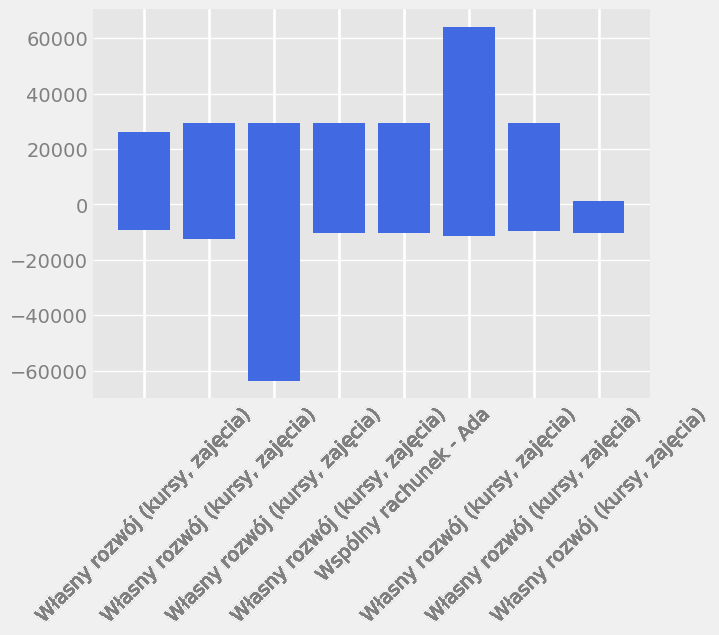

In [55]:
mask = (wydatki2["Rok"]==2023) & (wydatki["Rodzaj"]=="Debit")

plt.bar(x=wydatki2.loc[mask]["Rok_msc"], height=wydatki2.loc[mask]["Cena"], tick_label=wydatki2.loc[mask]["Kategoria"])
plt.xticks(rotation=45)
plt.show()

ValueError: too many values to unpack (expected 2)

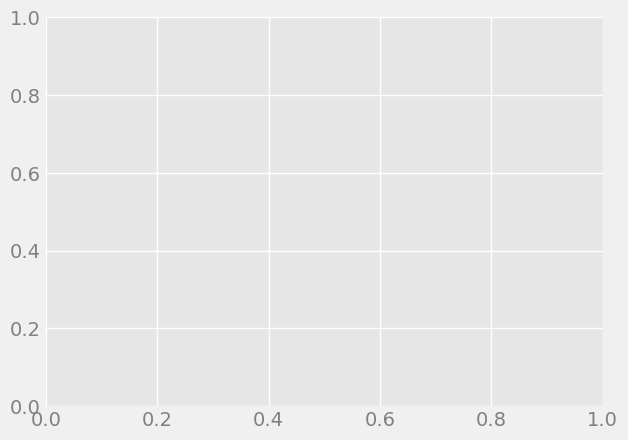

In [60]:
wydatki2 = wydatki[["Cena", "Rok", "Miesiac", "Rodzaj", "Kategoria"]].groupby(["Rok","Miesiac","Rodzaj", "Kategoria"]).sum()

fig, ax = plt.subplots()
for category, group in wydatki_plot:
    ax.bar(group['Rok_msc'], group['Cena'], label=category)

ax.set_xlabel("Rok - miesiac")
ax.set_ylabel("Suma wydatkow")
ax.set_title('Wykres slupkowy')
ax.legend()

plt.show()